## Log Analysis

#### Notebook used to analize the results of the log crated when running the robot arm.

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

__author__ = "Alberto Abarzua"

In [2]:
#load the data

log_commands_og = pd.read_csv("log_commands.csv")
log_commands = log_commands_og.apply(lambda x: abs(x))
log_commands.describe()

,time,steps_j1,steps_j2,steps_j3,steps_j4,steps_j5,steps_j6
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.022768,1.547080,1.325387,16.897497,1.952324,2.046484,2.016687
std,0.022874,2.197821,1.860970,10.200448,14.075067,1.627327,14.069287
min,0.020088,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.021093,0.000000,0.000000,10.000000,0.000000,1.000000,0.000000
50%,0.021533,0.000000,1.000000,16.000000,0.000000,2.000000,0.000000
75%,0.022133,4.000000,2.000000,20.000000,1.000000,3.000000,1.000000
max,0.671809,7.000000,9.000000,64.000000,396.000000,7.000000,396.000000


In [18]:
#Commands per second.

print("Commands sent per second",1/log_commands_og["time"].mean(),"[cmd/s]")

joint_means = [log_commands[f"steps_j{i+1}"].mean() for i in range(6)]
avg_step_per_command = sum(joint_means)/6
print("Average step for all joints",avg_step_per_command,"[step]")
print("Average interval between commands in seconds: ",log_commands["time"].mean(),"[s]")

speeds = [1488,1071,4500,600,700,600] #steps per second

avg_speed = sum(speeds)/6
avg_completion_per_joint = []
for i in range(6):
    cur = log_commands[f"steps_j{i+1}"].mean()/speeds[i]
    avg_completion_per_joint.append(cur)
    
print("avg_speed ",avg_speed,"[steps/s]")
print("\n--- average number of steps sent to joint---\n")
_ =[print("Joint {} {:.4f} [step]".format(i+1,x)) for i,x in enumerate(joint_means)]
print("\n--- average completion time per joint---\n")

_ =[print("Joint {} {:.4f} [s]".format(i+1,x)) for i,x in enumerate(avg_completion_per_joint)]





Commands sent per second 43.921763246774844 [cmd/s]
Average step for all joints 4.297576479936432 [step]
Average interval between commands in seconds:  0.022767756257450106 [s]
avg_speed  1493.1666666666667 [steps/s]

--- average number of steps sent to joint---

Joint 1 1.5471 [step]
Joint 2 1.3254 [step]
Joint 3 16.8975 [step]
Joint 4 1.9523 [step]
Joint 5 2.0465 [step]
Joint 6 2.0167 [step]

--- average completion time per joint---

Joint 1 0.0010 [s]
Joint 2 0.0012 [s]
Joint 3 0.0038 [s]
Joint 4 0.0033 [s]
Joint 5 0.0029 [s]
Joint 6 0.0034 [s]


In [22]:
#Generate speeds so that completion if the same for all joints.

des_speeds = []
desired_completition = log_commands["time"].mean()/10
for i in range(6):
    cur = log_commands[f"steps_j{i+1}"].mean()/desired_completition
    des_speeds.append(cur)
print(f"\n--- Speed in steps/s to achieve completion of {desired_completition:.4f} [s]  --\n")

_ =[print("Joint {} {} [steps/s]".format(i+1,round(x))) for i,x in enumerate(des_speeds)]
    



--- Speed in steps/s to achieve completion of 0.0023 [s]  --

Joint 1 680 [steps/s]
Joint 2 582 [steps/s]
Joint 3 7422 [steps/s]
Joint 4 857 [steps/s]
Joint 5 899 [steps/s]
Joint 6 886 [steps/s]


In [4]:
log_angles_og = pd.read_csv("log_angles.csv")
log_angles = log_angles_og.apply(lambda x: abs(x))
log_angles.describe()

,time,angles_j1,angles_j2,angles_j3,angles_j4,angles_j5,angles_j6
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.022768,0.000795,0.001326,0.003036,0.009603,0.002874,0.009848
std,0.022874,0.001005,0.001362,0.001783,0.055320,0.001786,0.055295
min,0.020088,0.000000,0.000001,0.000290,0.000000,0.000005,0.000000
25%,0.021093,0.000008,0.000417,0.001938,0.002014,0.001369,0.002232
50%,0.021533,0.000251,0.000870,0.002893,0.003495,0.002899,0.003854
75%,0.022133,0.002042,0.001486,0.003586,0.005768,0.004401,0.005783
max,0.671809,0.003247,0.006672,0.011262,1.558245,0.008288,1.558244


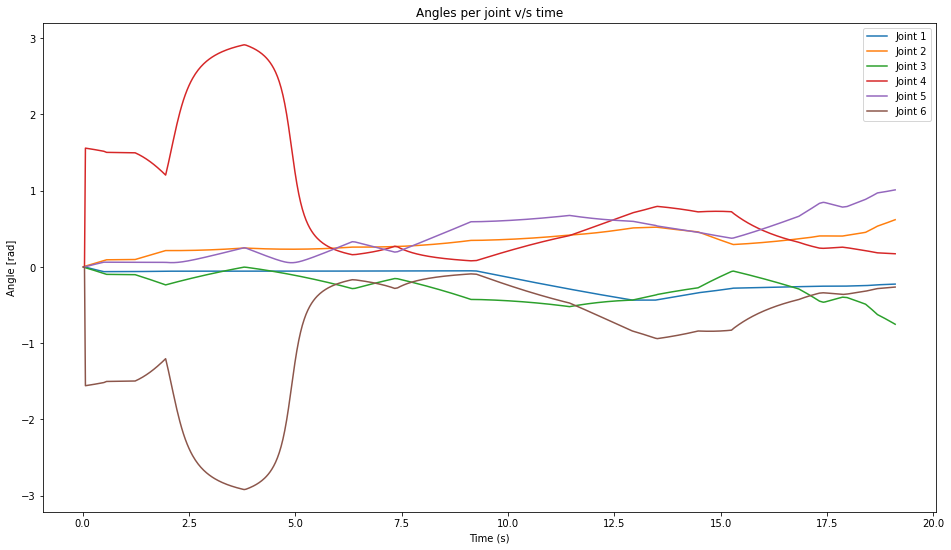

In [5]:
log_angles_cum = log_angles_og.cumsum()
plt.figure(figsize=(16, 9))

for i in range(6):
    plt.plot(log_angles_cum["time"],log_angles_cum[f"angles_j{i+1}"],label = f"Joint {i+1}")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Angle [rad]")
plt.title("Angles per joint v/s time")

plt.show()


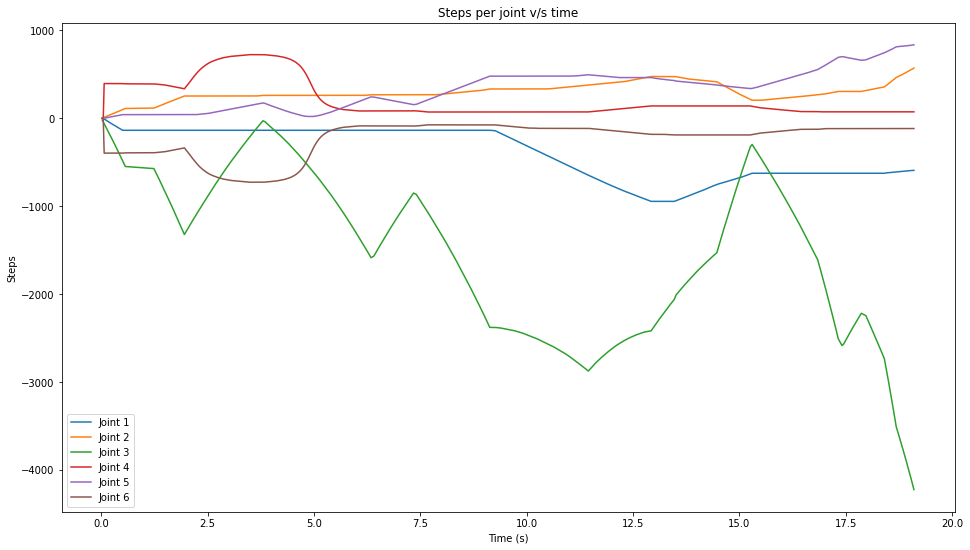

In [6]:
log_commands_cum = log_commands_og.cumsum()
plt.figure(figsize=(16, 9))

for i in range(6):
    plt.plot(log_commands_cum["time"],log_commands_cum[f"steps_j{i+1}"],label = f"Joint {i+1}")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Steps")
plt.title("Steps per joint v/s time")
plt.show()